In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output

data = pd.read_csv('./input/column_2C_weka.csv')
plt.style.use('seaborn-pastel')

X.npy
Y.npy
column_2C_weka.csv
column_3C_weka.csv
combats.csv
pokemon.csv
sample_submission.csv
test.csv
tests.csv
train.csv



# 8. Machine Learning 

## A. Supervised Learning 
* features(predictor vars) and target var. 
* Aim : predict target var. with features 
* Classification : category of target vars (ex. normal & abnormal) 
* Regression: countinuity

### Exploratory Data Analysis (EDA)



In [2]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### pd.plotting.scatter_matrix: 
* c : color
* diagonal : histogram of each features
* alpha : opacity
* s : size of marker
* marker : marker type 

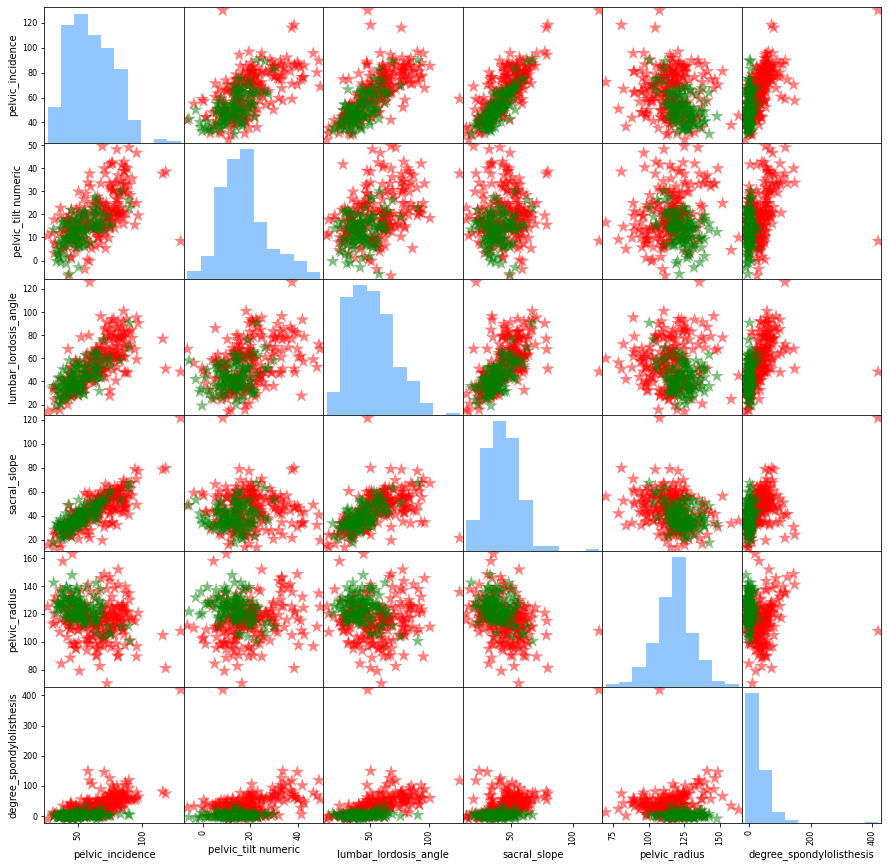

In [5]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = 'hist',
                          alpha = 0.5,
                          s = 200,
                          marker = '*')
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

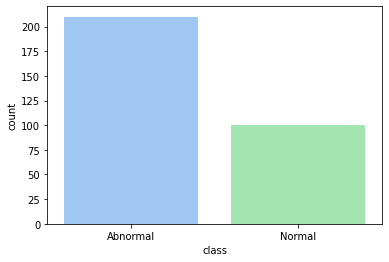

In [6]:
sns.countplot(x= 'class', data = data)
data.loc[:, 'class'].value_counts()

### K-Nearest Neighbors (KNN) 
* KNN : look at the K closest labeled data points
* classification method 
* Train = fit 
* fit(): fits(trains) the data
* predict() : predicts the data 
* x : features 
* y : target vars (normal or abnormal) 
* n_neighbors : K 

In [7]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x = data.loc[: , data.columns != 'class']
y = data.loc[: , 'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction : {}'.format(prediction))

Prediction : ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'A

* Train : use train set by fitting
* test : make prediction on test set  
* with rain and test sets, fitted data and tested data are different 
* train_test_split(x,y, test_size = 0.3, random_state = 1) 
    - x : features
    - y: target var
    - test_size: percentage of test size (30%)
    - random_state : sets a seed
* fit(x_train, y_train) : fit on train sets
* score(x_test, y_test): accuracy

In [8]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 18)
x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K = 18) accuracty is: ', knn.score(x_test, y_test))

With KNN (K = 18) accuracty is:  0.8817204301075269


### Model Complexity:
* K : hyperparameter - need to choose i.e. gives the best performance 
    - hyperparameter : parameter that user can choose
* K << : leads to overfit (only for test sets)
* K >> : leads to underfit (not trained well) 
* In this case, K = 18 shows the best performance : 88%

<Figure size 936x576 with 0 Axes>

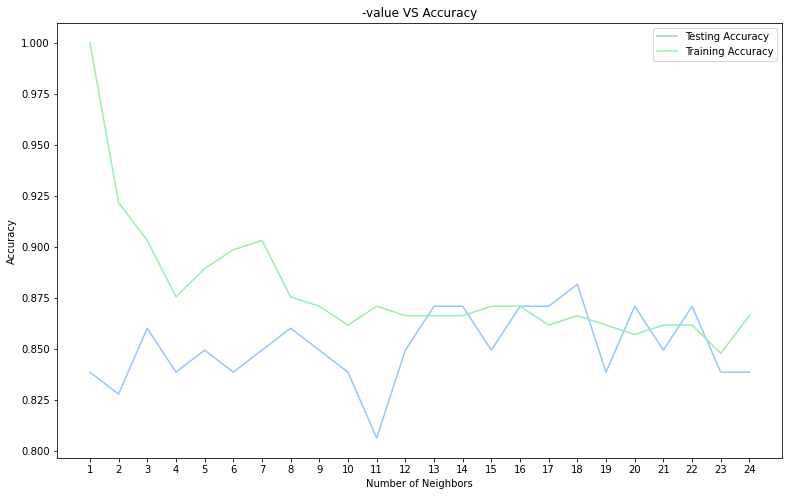

Best accuracy is 0.8817204301075269 with K = 18


In [9]:
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = [] 
for i, k in enumerate(neig): 
    # i = 0 ~ 23
    # k = 1 ~ 24
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
plt.figure(figsize = [13,8])
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

### Regression 
* Supervised Learning 
* Linear and logistic regression 

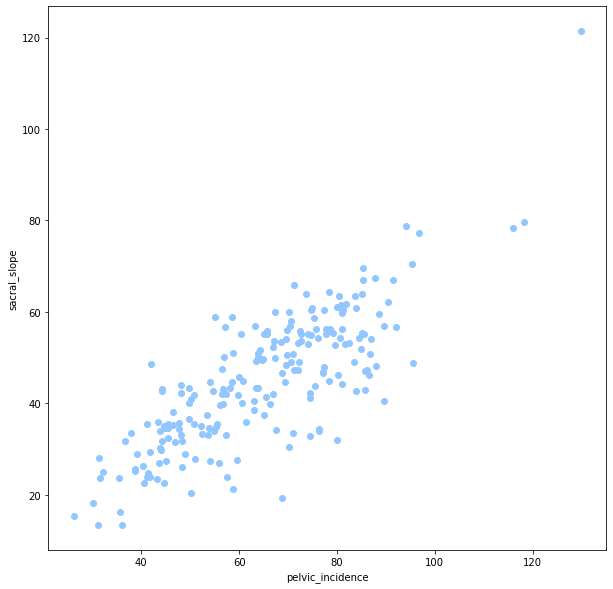

In [10]:
data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[: , 'pelvic_incidence']).reshape(-1,1) #(210,) - > (210,1)
y = np.array(data1.loc[: , 'sacral_slope']).reshape(-1,1)

plt.figure(figsize = [10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### Linear Regression 
* y = ax + b where y = target, x = feature and a = parameter of model
* Choose parameter of a model (a) according to minimum error function (lost function) 
* Use Ordinary Least Square (OLS) as lost function  
* OLS : sum of squares of the resiudal
* Score : R^2 method  i.e. ∆y_actual^2 / ∆y_predict^2

R^2 score :  0.6458410481075871


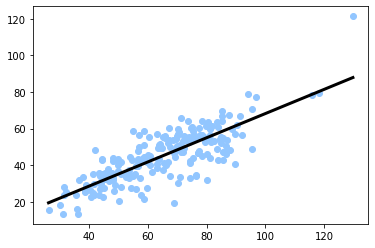

In [11]:
# Linear Regression 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 
predict_space = np.linspace(min(x), max(x)).reshape(-1,1) # linspace : divide into same difference

reg.fit(x,y)
predicted = reg.predict(predict_space)
print("R^2 score : ", reg.score(x,y))

plt.plot(predict_space, predicted, color ='black', linewidth = 3)
plt.scatter(x = x, y =y )
plt.show()

### Cross Validation  (CV) 
* K folds = K fold CV
* as K increases, cost increases
* cross_val_score(reg,x,y, cv = 5) : use reg with x and y defining at K = 5 (5 times) 


In [12]:
# Cross Validation
from sklearn.model_selection import cross_val_score 
reg = LinearRegression() 
k = 5 
cv_result = cross_val_score(reg, x, y, cv = k) #use R^2 as score
print('CV scores : ', cv_result)
print('C scores average :' , np.sum(cv_result)/k)

CV scores :  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
C scores average : 0.39314625028848693


### Regularized Regression 

Linear regression can cause overfitting
To avoid overfitting, use regularization that penalize large coeff. 

* Ridge Regression (L2 regularization) : 
    - lost function = OLS + alpha * sum (parameter ^ 2 ) 
    - alpha is one we need to choose to fit and predict 
    - alpha << : overfitting 
    - alpha >> : underfitting 

* Lasso regression (L1 regularization) : 
    - lost function  = OLS + alpha * sum (abs(parameter)) 
    - used to select important features of data. ( only one's values are not zero is chosen by regression) 


In [13]:
# Ridge regression 
from sklearn.linear_model import Ridge 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge (alpha = 0.1 , normalize = True )
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge Score : ', ridge.score(x_test,y_test))

Ridge Score :  0.5608287918841997


In [14]:
from sklearn.linear_model import Lasso 
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True )
lasso.fit(x_train, y_train) 
lasso_predict = lasso.predict(x_test)
print('Lasso Score : ', lasso.score(x_test,y_test))
print('Lasso coefficients : ', lasso.coef_)

Lasso Score :  0.9640334804327546
Lasso coefficients :  [ 0.82498243 -0.7209057   0.         -0.        ]


Coefficient shows that pelvic_incidence and pelvic_tilt numeric are only important features

### Confusion Matrix 
* tp = true positive, fp = false positive, fn = false negative, tn = true negative 
* precision = tp / (tp + fp ) - predicted to be positive
* recall = tp / (tp + fn )  - actually positive 
* f1 = 2 * precision  * recall / (precision + recall) 

In [15]:
# confusion matrix with random forest 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm  = confusion_matrix(y_test, y_pred)
print('confusion_matrix : \n', cm)
print('Classification Report: \n', classification_report(y_test, y_pred))

confusion_matrix : 
 [[60  6]
 [ 8 19]]
Classification Report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



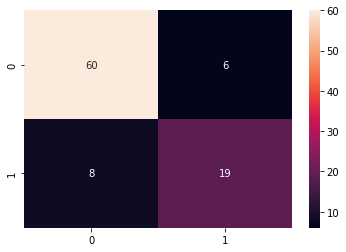

In [16]:
sns.heatmap(cm, annot = True , fmt = 'd')
plt.show()

### ROC curve with Logistic Regression 

* logistic regression output is probability 
* if prob > 0.5 -> labeled 1 (abnormal) , else 0 (normal 
* By default logistic regression, threshold is 0.5 
* ROC : receiver opreation characteristic
    - x-axis : false positive rate
    - y-axis : true positive rate 
* If the curve is closer to left-top corner, it is more accurate 
* ROC curve score is auc i.e. computation area under the curve from prediction scores 
* We want auc to closer 1 
* fpr = false positive rate, tpr = true positive rate 

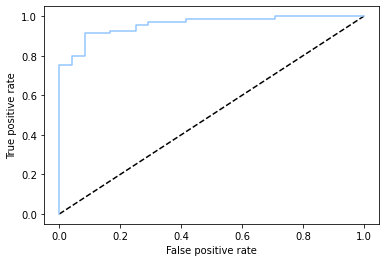

In [44]:
# ROC curve with logistic regression 
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression 
data['class_binary'] = [ 1 if i == 'Abnormal' else 0 for i in data.loc[:, 'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression() 
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### Hyperparameter Tuning

* Examples :
    - K at KNN
    - alpha at Ridge and Lasso
    - Random forest parameter (ex. max_depth)
    - Linear regression parameters (coeff.) 
* Tuning 
    - Try all combinations
    - fit all of them
    - measure prediction performance 
    - see how well each performs 
    - finally choose best parameters
* grid : K is from 1 to 50 
* GridSearchCV takes knn and grid and makes grid search

In [45]:
# grid search cross validation with 1 hyperparameter 
from sklearn.model_selection import GridSearchCV 
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV (knn, grid, cv = 3)
knn_cv.fit(x,y)

print("tuned hyperparameter k : {}".format(knn_cv.best_params_))
print("Berst score: {}".format(knn_cv.best_score_))

tuned hyperparameter k : {'n_neighbors': 4}
Berst score: 0.7559434901667911


In [59]:
knn_cv.cv_results_

{'mean_fit_time': array([0.00245396, 0.00113916, 0.00119289, 0.0010372 , 0.00098125,
        0.0009795 , 0.00097394, 0.00097688, 0.00097529, 0.0009714 ,
        0.00097378, 0.00097124, 0.00096917, 0.00097267, 0.00097601,
        0.00097569, 0.000971  , 0.00097068, 0.0009803 , 0.00097593,
        0.00097696, 0.0009807 , 0.00098165, 0.00097807, 0.0009803 ,
        0.00098022, 0.00098427, 0.00098586, 0.00098499, 0.00098395,
        0.0009857 , 0.00098666, 0.00098594, 0.00098395, 0.00097982,
        0.00098554, 0.00098856, 0.00098769, 0.00098983, 0.00099031,
        0.00099142, 0.0009896 , 0.00098832, 0.00098483, 0.00098697,
        0.00098968, 0.00099301, 0.00099285, 0.0009892 ]),
 'std_fit_time': array([1.48463694e-03, 1.08609193e-04, 2.16911325e-04, 6.43030226e-05,
        4.10344780e-06, 4.51249109e-06, 2.80754117e-06, 3.23601930e-06,
        2.46494014e-06, 1.80877156e-06, 3.80640984e-06, 2.48026634e-06,
        8.92080638e-07, 1.18944085e-06, 2.88957897e-06, 4.51249109e-06,
        2

* First hyperparameter C : logistic regression regularization param    
* Second hyperparameter Penalty(lost function): l1(Lasso) or l2(Ridge) 

In [19]:
#grid search cross validation w/ 2 hyperparams
param_grid = {'C': np.logspace(-3,3,7), 'penalty' : ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression() 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3)
logreg_cv.fit(x_train, y_train) 

print('Tuned hyperparameters : {}'.format(logreg_cv.best_params_))
print('Best Accuracy: {}'.format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


### Pre-Processing Data

* Convert to numerical value

In [20]:
data = pd.read_csv('./input/column_2C_weka.csv')
df = pd.get_dummies(data)  #class -> class_Abnormal & class_Normal
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [21]:
df.drop('class_Normal', axis = 1, inplace = True) # drop one duplicated row
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


### Centering, Scaling or Normalizing
* Scaling : standardization = (x-x.mean) / x.variance  or x - x.min / x.range 
* Pipeline : assemble several steps (ex. svm (classifier), standardization)
* Parameter name : stepName__prameterName
* Grid Search

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C' : [1,10,100], 'SVM__gamma' : [0.1,0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)
cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)
print("Accuracy : {}".format(cv.score(x_test,y_test)))
print('Tuned Model Parameters: {}'.format(cv.best_params_))

Accuracy : 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


# Unsupervised Learning

* uses unlabeled data
* drop target variables to work on unsupervised learning 

### KMeans Cluster
* algorithm works iteratively to assign each data point to one of K groups based on the featuers that are provided
* KMeans(n_clusters = 2) : n_clusters = 2 means 'create 2 clusters'

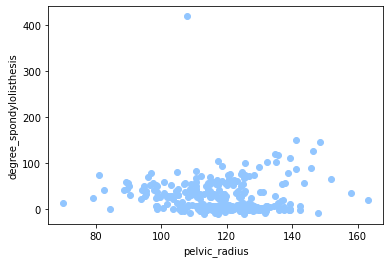

In [23]:
data = pd.read_csv('./input/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

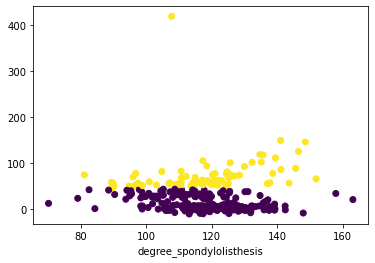

In [24]:
#KMeans Clustering 
data2 = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()


### Evaluating of Clustering

* To evaluate clustering, use cross tabulation table
* Two clusters : 0 and 1 
* First class 0 includes 138 abnormals and 100 normals 
* Second class 1 includes 72 abnormals and 0 normal

In [25]:
# Cross tabulation table
df = pd.DataFrame({'labels': labels, 'class': data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


* inertia : how much the custers are spread out from each sample 
* lower inertia -> more clusters

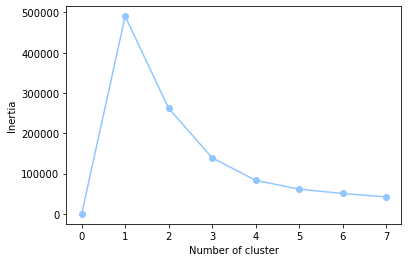

In [26]:
# inertia 
inertia_list  = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8), inertia_list, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

### Standardization

In [27]:
data = pd.read_csv('./input/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)


In [28]:
from sklearn.pipeline import make_pipeline 
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)


class   Abnormal  Normal
labels                  
0            113      10
1             97      90


### Hierarchy 
* vertical lines are clusters
* height on dendogram : distance between merging cluster
* method = 'single' : closest points of clusters

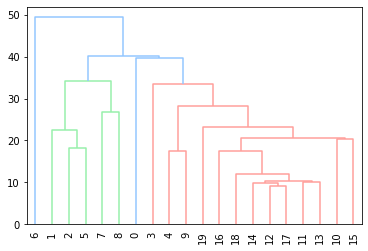

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
merge = linkage(data3.iloc[200:220, : ], method = 'single')
dendrogram(merge, leaf_rotation = 90, leaf_font_size = 10)
plt.show()

In [30]:
data3.iloc[200:220, :]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
200,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706
201,67.513053,33.275590,96.283062,34.237463,145.601033,88.301486
202,76.314028,41.933683,93.284863,34.380345,132.267286,101.218783
203,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787
204,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629
209,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799


### T - Distributed Stochastic Neighbor Embedding  ( T-SNE) 
* learning rate : 50 ~ 200 in normal
* fit_transform : both fit and transform

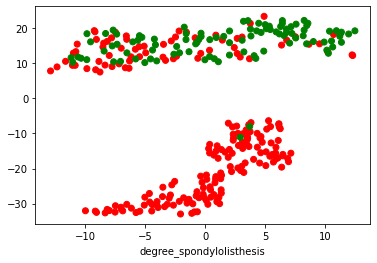

In [31]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data2)
x = transformed[:, 0]
y = transformed[:, 1]
plt.scatter(x,y, c = color_list)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

### Principle Component Analysis (PCA) 
* Fundamental dimension reduction technique 
* Decorrelation : 
    - rotates data samples to be aligned with axes
    - shifts  data samples so they have mean zero
    - no info. lost
    - fit() : learn how to shift samples
    - transform() : apply the learned transformation
* resulting PCA features are not linearly correlated
* Principle components: directions of variance 

In [32]:
# PCA 
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components : ', model.components_)

Principle components :  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08932863e-11 -5.77350269e-01
  -3.59069718e-12  3.06754622e-12]]


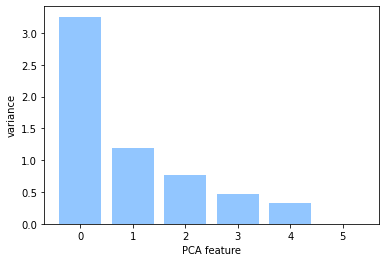

In [33]:
# PCA variance 
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

* Intrinsic dimension : # of feauters needed to approximate the data
* PCA identifies intrinsic dimension
* Intrinsic dimension = # of PCA features with significant variance
* To choose intrinsic dimension, try all and find the best accuracy